In [123]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Task Phases for EDA using Python: 
1. Data Preprocessing: 

• Load the Data: 


In [124]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Global_Temp.csv')

Initial Data Inspection


In [125]:
# Inspect first rows of the DataFrame
print(df.head())

                                                                                          Land-Ocean: Global Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                       SON
1880 -.20 -.26 -.09 -.17 -.10 -.22 -.21 -.11 -.16 -.23 -.23 -.19 -.18 ***  ***  -.12 -.18                     -.21
1881 -.20 -.16 .02  .03  .06  -.19 .00  -.05 -.16 -.22 -.19 -.08 -.10 -.11 -.18 .04  -.08                     -.19
1882 .15  .13  .04  -.17 -.14 -.23 -.17 -.08 -.15 -.24 -.17 -.37 -.12 -.09 .07  -.09 -.16                     -.19
1883 -.30 -.37 -.13 -.19 -.18 -.08 -.08 -.15 -.23 -.12 -.24 -.12 -.18 -.20 -.35 -.17 -.10                     -.20


Check the shape & data types


In [126]:
print(df.shape)
print(df.dtypes)

(146, 1)
Land-Ocean: Global Means    object
dtype: object


• Clean the Data:



In [127]:
# Reload the dataset with proper parsing to handle spacing issues
df = pd.read_csv('Global_Temp.csv', skiprows=1)  # Skipping the first row as it might be incorrectly formatted


In [128]:
# Rename columns for easier access
df.columns = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec",
              "J-D", "D-N", "DJF", "MAM", "JJA", "SON"]



In [129]:
# Ensure the 'Year' column is in integer format
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

# Convert all temperature anomaly columns to numeric, handling non-numeric values
for col in df.columns[1:]:  # Excluding 'Year'
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Check for missing values
missing_values = df.isnull().sum()



In [130]:
# Fill missing values with the column mean
df.fillna(df.mean(), inplace=True)

# Verify the data types and missing values after cleaning
df_info = df.info()

# Display missing values count
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    Int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     145 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: Int64(1), float64(18)
memory usage: 21.8 KB


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     1
DJF     1
MAM     0
JJA     0
SON     0
dtype: int64

In [131]:
# Check if the data now has the correct structure
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    Int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     145 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: Int64(1), float64(18)
memory usage: 21.8 KB


(None,
    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
 0  1880 -0.20 -0.26 -0.09 -0.17 -0.10 -0.22 -0.21 -0.11 -0.16 -0.23 -0.23   
 1  1881 -0.20 -0.16  0.02  0.03  0.06 -0.19  0.00 -0.05 -0.16 -0.22 -0.19   
 2  1882  0.15  0.13  0.04 -0.17 -0.14 -0.23 -0.17 -0.08 -0.15 -0.24 -0.17   
 3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.15 -0.23 -0.12 -0.24   
 4  1884 -0.13 -0.09 -0.37 -0.41 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   
 
     Dec   J-D       D-N       DJF   MAM   JJA   SON  
 0 -0.19 -0.18  0.074444  0.068889 -0.12 -0.18 -0.21  
 1 -0.08 -0.10 -0.110000 -0.180000  0.04 -0.08 -0.19  
 2 -0.37 -0.12 -0.090000  0.070000 -0.09 -0.16 -0.19  
 3 -0.12 -0.18 -0.200000 -0.350000 -0.17 -0.10 -0.20  
 4 -0.31 -0.29 -0.270000 -0.110000 -0.37 -0.32 -0.29  )

2. Exploratory Data Analysis (EDA): 


In [132]:
# Compute summary statistics
summary_stats = df.describe()

# Identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers = df[outlier_mask].dropna(how="all")



In [133]:
# Print the summary statistics and detected outliers
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
            Year         Jan         Feb         Mar         Apr         May  \
count      145.0  145.000000  145.000000  145.000000  145.000000  145.000000   
mean      1952.0    0.068690    0.077172    0.094828    0.068690    0.057862   
std    42.001984    0.434603    0.441759    0.446745    0.408954    0.389138   
min       1880.0   -0.810000   -0.630000   -0.630000   -0.600000   -0.550000   
25%       1916.0   -0.250000   -0.240000   -0.230000   -0.250000   -0.240000   
50%       1952.0   -0.010000   -0.040000    0.010000   -0.030000   -0.040000   
75%       1988.0    0.320000    0.390000    0.320000    0.290000    0.280000   
max       2024.0    1.240000    1.440000    1.390000    1.310000    1.160000   

              Jun         Jul         Aug         Sep         Oct         Nov  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.045724    0.070276    0.068552    0.073793    0.099655    0.091655   
std      0.38858

In [134]:
print("\nDetected Outliers:")
print(outliers.dropna(how="all"))


Detected Outliers:
     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
135  <NA>   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.07  1.06   
136  <NA>  1.18  1.37  1.35   NaN   NaN   NaN   NaN  1.02   NaN   NaN   NaN   
137  <NA>   NaN   NaN  1.17   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
138  <NA>   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.01   NaN   
139  <NA>   NaN   NaN  1.17   NaN   NaN   NaN  0.94   NaN  0.93  0.99  0.98   
140  <NA>  1.18   NaN  1.18  1.12   NaN   NaN   NaN   NaN  0.96   NaN  1.09   
141  <NA>   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.98   NaN   
142  <NA>   NaN   NaN   NaN   NaN   NaN   NaN  0.94   NaN   NaN  0.97   NaN   
143  <NA>   NaN   NaN  1.23   NaN   NaN  1.08  1.19  1.19  1.48  1.34  1.42   
144  <NA>  1.24  1.44  1.39  1.31  1.16  1.24  1.20  1.30  1.23  1.33  1.29   

      Dec   J-D   D-N   DJF   MAM   JJA   SON  
135  1.17   NaN   NaN   NaN   NaN   NaN  0.99  
136   NaN   Na

Time Series Plot (Overall Global Trend)


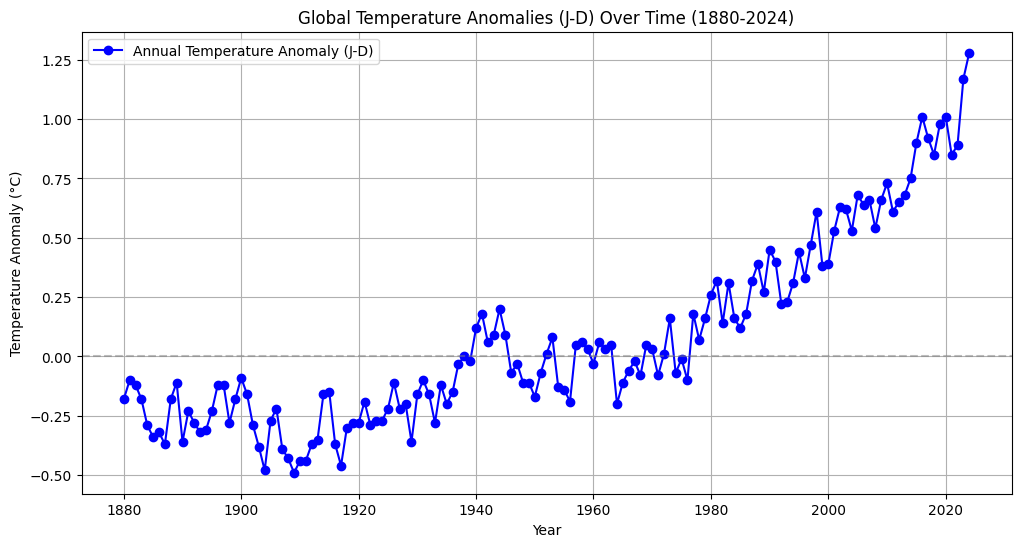

In [135]:

# Plot the overall trend of global temperature anomalies (J-D) over time
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["J-D"], marker='o', linestyle='-', color='b', label="Annual Temperature Anomaly (J-D)")

# Add title and labels
plt.title("Global Temperature Anomalies (J-D) Over Time (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline for reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Monthly Anomalies Visualization


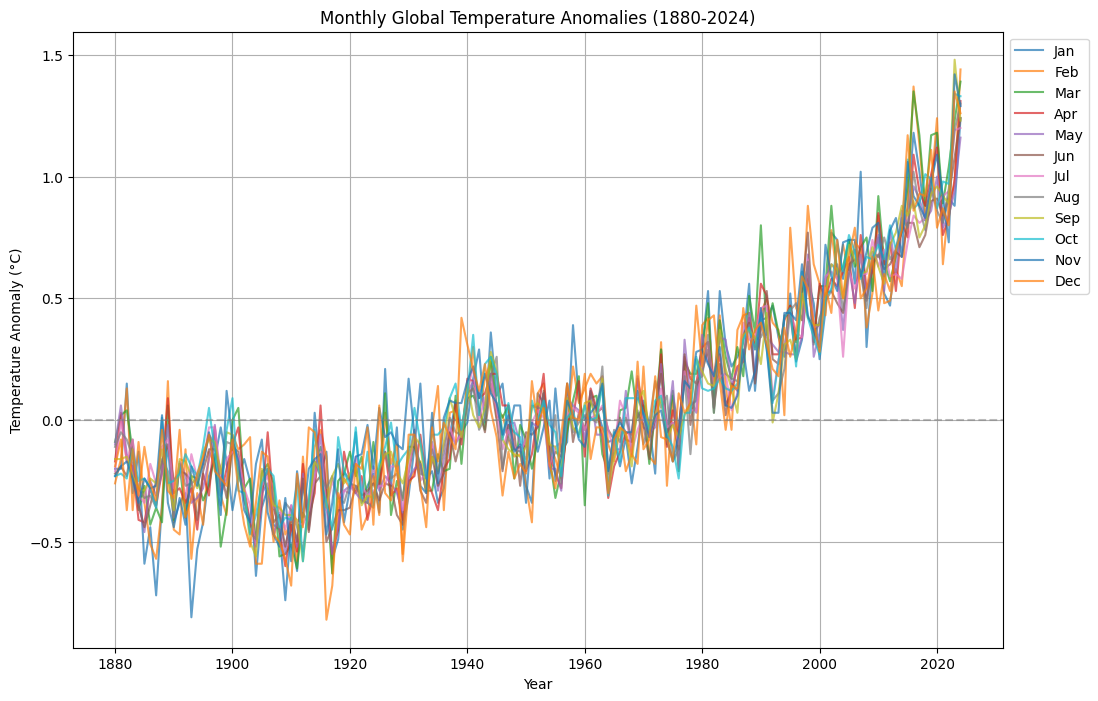

In [136]:
# Plot Monthly Temperature Anomalies Over Time
plt.figure(figsize=(12, 8))

# Plot each month's temperature anomaly trend
for month in df.columns[1:13]:  # Selecting Jan-Dec columns
    plt.plot(df["Year"], df[month], label=month, alpha=0.7)

# Add title and labels
plt.title("Monthly Global Temperature Anomalies (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline reference
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)

# Show plot
plt.show()

Seasonal Anomalies Visualization: 

Seasonal Temperature Trends (DJF, MAM, JJA, SON)


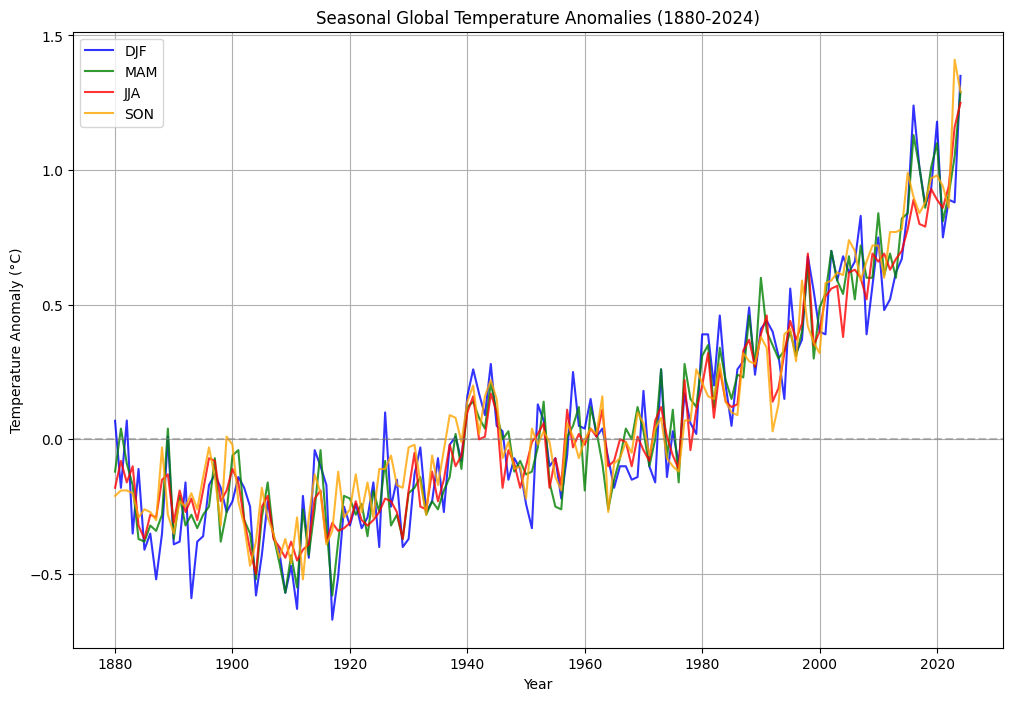

In [137]:
# Plot Seasonal Temperature Anomalies Over Time
plt.figure(figsize=(12, 8))

# Plot each season's temperature anomaly trend
seasons = ["DJF", "MAM", "JJA", "SON"]
colors = ["b", "g", "r", "orange"]  # Assign colors for differentiation

for season, color in zip(seasons, colors):
    plt.plot(df["Year"], df[season], label=season, color=color, alpha=0.8)

# Add title and labels
plt.title("Seasonal Global Temperature Anomalies (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Annual Temperature Distribution (Histogram & Boxplot)


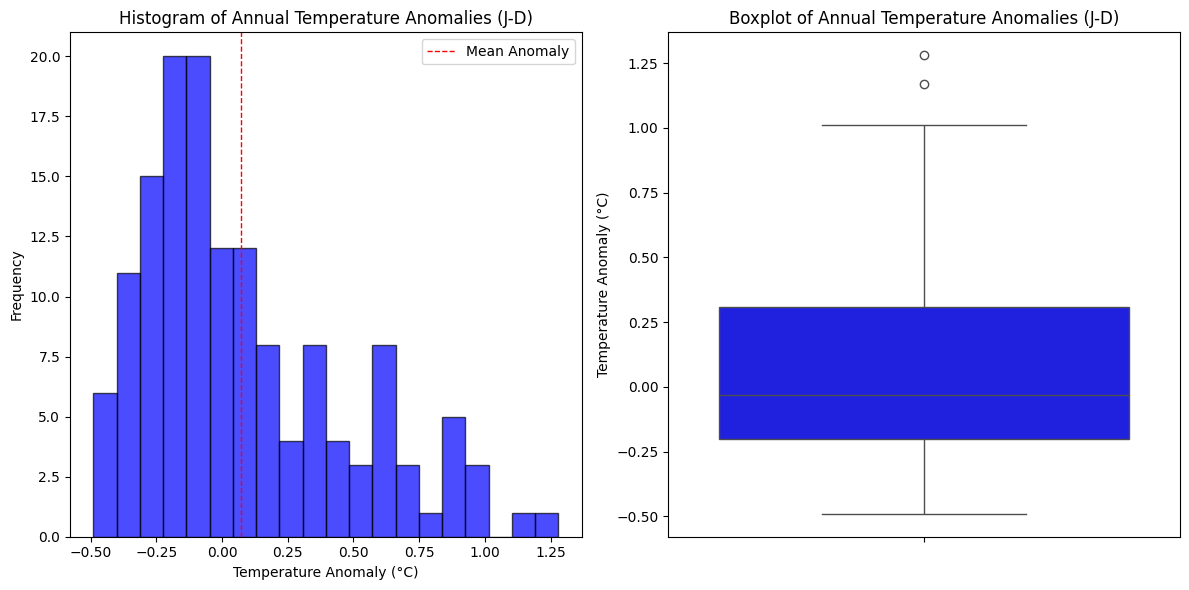

In [138]:
# Create a figure for histogram and boxplot
plt.figure(figsize=(12, 6))

# Histogram of Annual Temperature Anomalies (J-D)
plt.subplot(1, 2, 1)
plt.hist(df["J-D"], bins=20, color="blue", alpha=0.7, edgecolor="black")
plt.title("Histogram of Annual Temperature Anomalies (J-D)")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.axvline(df["J-D"].mean(), color='red', linestyle='dashed', linewidth=1, label="Mean Anomaly")
plt.legend()

# Boxplot of Annual Temperature Anomalies (J-D)
plt.subplot(1, 2, 2)
sns.boxplot(y=df["J-D"], color="blue")
plt.title("Boxplot of Annual Temperature Anomalies (J-D)")
plt.ylabel("Temperature Anomaly (°C)")

# Show plots
plt.tight_layout()
plt.show()

Seasonal Comparison: Side-by-side bar plots to compare the temperature anomalies for each 
season over the years.

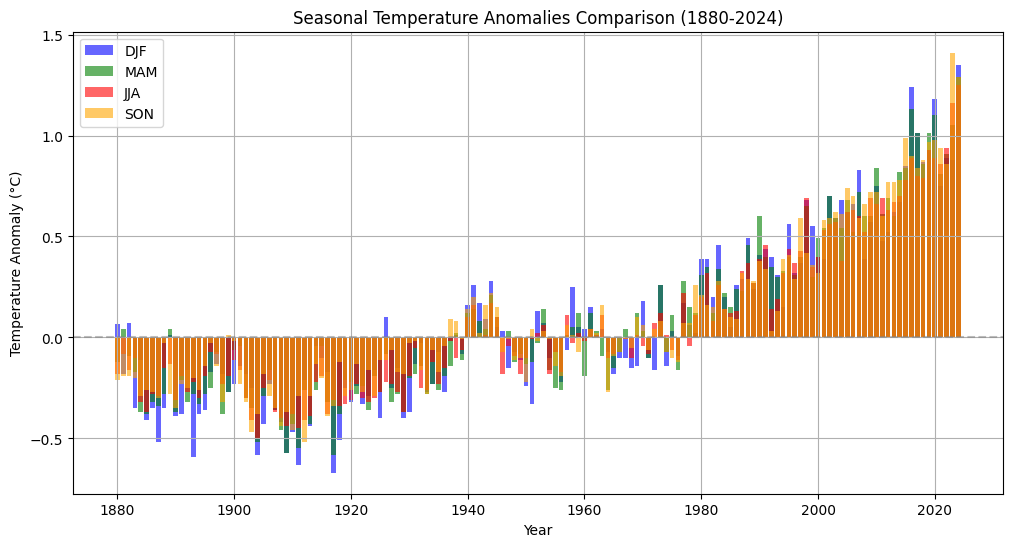

In [139]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Define colors for each season
season_colors = ["blue", "green", "red", "orange"]

# Plot bar charts for each season
seasons = ["DJF", "MAM", "JJA", "SON"]
for i, season in enumerate(seasons):
    plt.bar(df["Year"], df[season], color=season_colors[i], alpha=0.6, label=season)

# Add title and labels
plt.title("Seasonal Temperature Anomalies Comparison (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Moving Averages


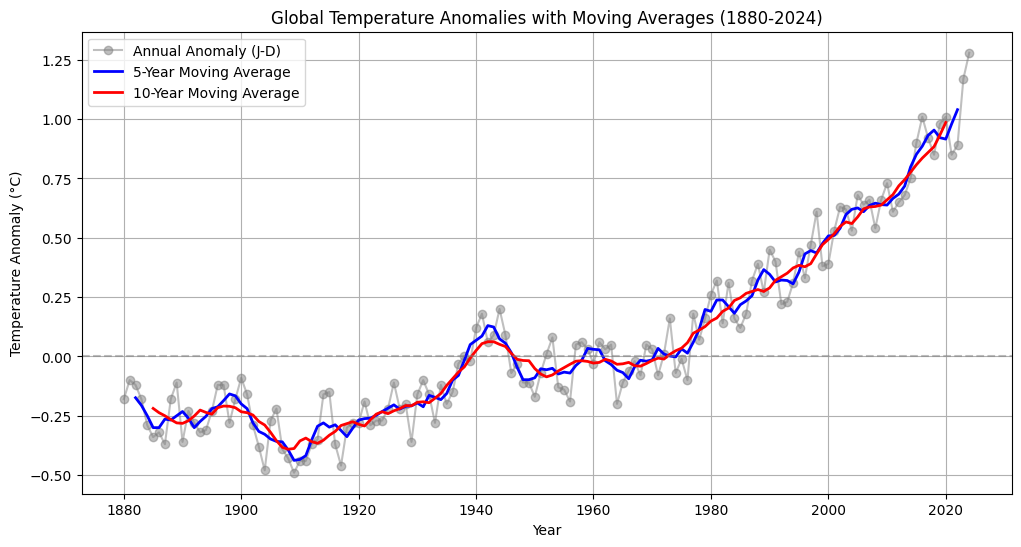

In [140]:
# Calculate 5-year and 10-year moving averages for annual temperature anomalies (J-D)
df["5-Year MA"] = df["J-D"].rolling(window=5, center=True).mean()
df["10-Year MA"] = df["J-D"].rolling(window=10, center=True).mean()

# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["J-D"], marker='o', linestyle='-', color='gray', alpha=0.5, label="Annual Anomaly (J-D)")
plt.plot(df["Year"], df["5-Year MA"], color='blue', linewidth=2, label="5-Year Moving Average")
plt.plot(df["Year"], df["10-Year MA"], color='red', linewidth=2, label="10-Year Moving Average")

# Add title and labels
plt.title("Global Temperature Anomalies with Moving Averages (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Correlation Analysis (Heatmap of Monthly & Seasonal Anomalies)


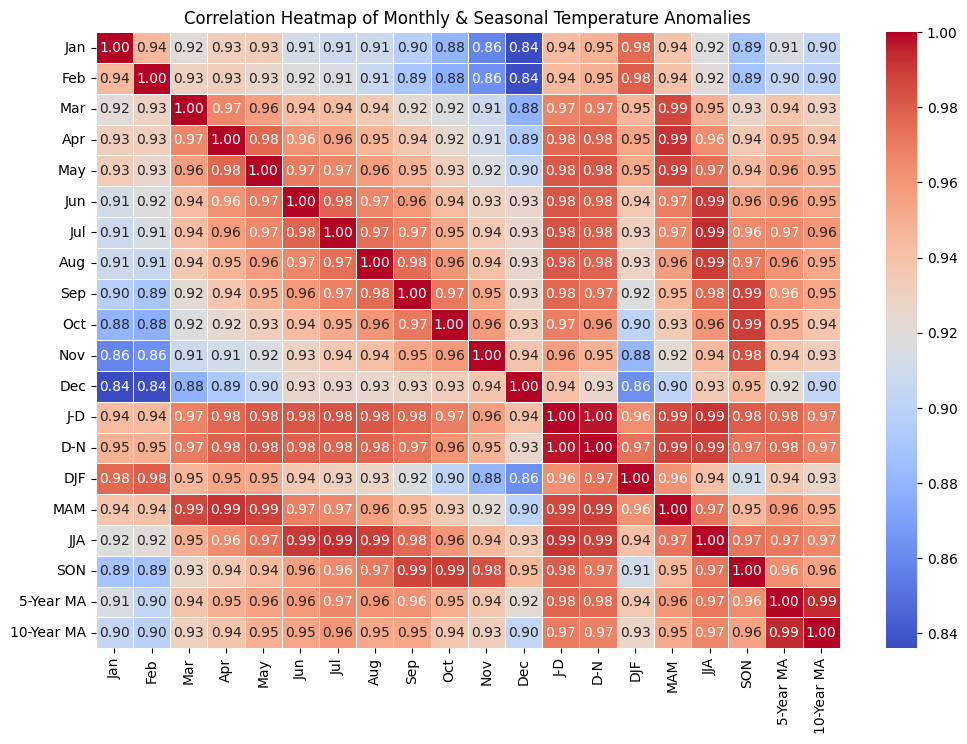

In [141]:
# Compute correlation matrix for monthly and seasonal anomalies
correlation_matrix = df.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Monthly & Seasonal Temperature Anomalies")

# Show plot
plt.show()

Month vs. Year Correlation: Using a heatmap or pairplot to visualize how temperature anomalies in each month correlate 
with each other across the years.

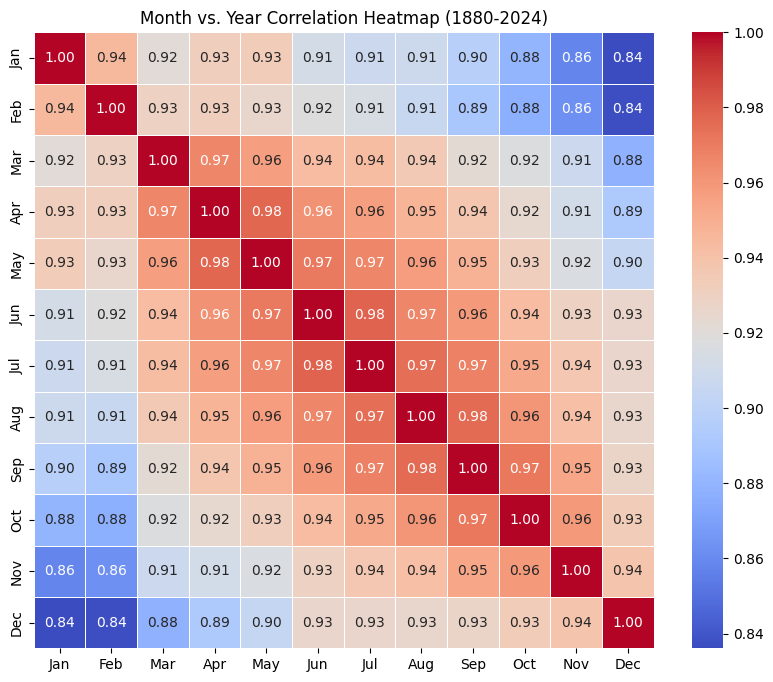

In [142]:
# Compute the correlation matrix for monthly anomalies (Jan-Dec)
monthly_correlation = df.iloc[:, 1:13].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Month vs. Year Correlation Heatmap (1880-2024)")

# Show plot
plt.show()

 Detecting Anomalies: Extreme Anomalies Detection (Highlighting Record-High Years)


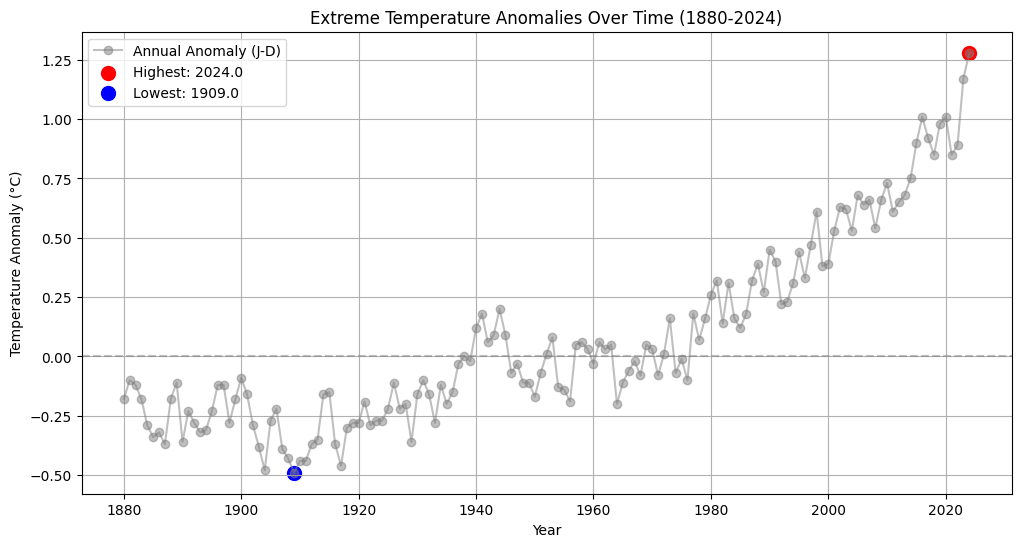

Year with Highest Temperature Anomaly: 2024.0 (1.28 °C)
Year with Lowest Temperature Anomaly: 1909.0 (-0.49 °C)


In [143]:
# Identify the years with the highest and lowest temperature anomalies (J-D)
max_anomaly_year = df.loc[df["J-D"].idxmax(), ["Year", "J-D"]]
min_anomaly_year = df.loc[df["J-D"].idxmin(), ["Year", "J-D"]]

# Plot Annual Temperature Anomalies (J-D) with Extreme Points Highlighted
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["J-D"], marker='o', linestyle='-', color='gray', alpha=0.5, label="Annual Anomaly (J-D)")

# Highlight record-high and record-low years
plt.scatter(max_anomaly_year["Year"], max_anomaly_year["J-D"], color='red', s=100, label=f"Highest: {max_anomaly_year['Year']}")
plt.scatter(min_anomaly_year["Year"], min_anomaly_year["J-D"], color='blue', s=100, label=f"Lowest: {min_anomaly_year['Year']}")

# Add title and labels
plt.title("Extreme Temperature Anomalies Over Time (1880-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Baseline reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print extreme anomaly years
print(f"Year with Highest Temperature Anomaly: {max_anomaly_year['Year']} ({max_anomaly_year['J-D']} °C)")
print(f"Year with Lowest Temperature Anomaly: {min_anomaly_year['Year']} ({min_anomaly_year['J-D']} °C)")

Step 8: Summary of Key Findings & Insights
